In [250]:
from mesa import Agent, Model
from mesa.time import RandomActivation
import random
from copy import copy
import matplotlib.pyplot as plt
import pandas as pd



In [196]:
class Man(Agent):
        def __init__(self, unique_id, adol, model):
            super().__init__(unique_id,model)
            self.id = unique_id
            self.adol = adol
            self.age = 0
            self.gender = "M"
            self.married = False
            self.asp = 50
            self.value = random.choice(range(100))

        def step(self):
            self.age += 1
            if self.married:
                return
            partner = self.getMatch()
            if self.age <= self.adol:
                self.updateAsp(partner)
                return
            self.married = self.match
            partner.married = self.match
            self.aom = (self.match and self.age or None)
            partner.aom = (self.match and partner.age or None)
            
        def getMatch(self):
            valid_match = False
            while valid_match == False:
                partner = random.choice(self.model.women)
                if partner.married != True:
                    valid_match = True
                    
            self.makeoffer = bool(self.asp <= partner.value)
            partner.makeoffer = bool(partner.asp <= self.value)
            
            self.getoffer = copy(partner.makeoffer)
            partner.getoffer = copy(self.makeoffer)
            
            self.match = bool(self.makeoffer == True and self.getoffer == True)
            partner.match = self.match
            
            return partner
            
        def updateAsp(self,partner):
            
            if self.match: #if there is a match
                if partner.value >= self.asp: #and if the woman's value > mans aspiration
                    self.asp = copy(partner.value) #replace the mans's aspiration with the man's value
                if self.value >= partner.asp: #and if the mans value > womans aspiration
                    partner.asp = copy(self.value) #replace the woman's aspiration with the woman's value
            
            if not self.getoffer: #if the man didnt get an offer
                if partner.value < self.asp: #and the woman's value is below his aspiration
                    self.asp = copy(partner.value) #change his aspiration to her value
                    
            if not self.makeoffer: #if the man didnt make an offer
                if self.value < partner.asp: #and the woman's aspiration is above his value
                    partner.asp = copy(self.value) #change her aspiration to his value
    
class Woman(Man):
        def __init__(self,unique_id,adol,model):
            super().__init__(unique_id,adol,model)
            self.gender = "F"
        

In [345]:
class MarriageModel(Model):
    
    def __init__(self,N,adol):
        self.num_agents = N
        self.schedule = RandomActivation(self)
        self.adol = adol
        self.women = []
        self.men = []
        #Create agents
        for i in range(self.num_agents):
            self.women.append(Woman(i,adol,self))
            self.schedule.add(Man(i,adol,self))
            
            
    def step(self):
        self.schedule.step()
            
            

In [346]:

fixedModel = MarriageModel(100, 12)
for i in range(90):
    fixedModel.step()

In [347]:
m_ages_at_marriage = pd.Series([a.aom for a in fixedModel.schedule.agents if a.aom is not None])
frequency = (m_ages_at_marriage.value_counts())/100
#frequency = pd.Series(frequency.index.values, index=frequency)
frequency.sort_index(inplace=True)

13    0.07
14    0.08
15    0.07
16    0.04
17    0.04
18    0.01
19    0.02
20    0.01
21    0.01
22    0.01
23    0.01
24    0.05
26    0.01
28    0.01
29    0.02
35    0.02
39    0.01
44    0.02
47    0.01
49    0.01
50    0.01
51    0.01
58    0.01
74    0.01
77    0.01
83    0.01
dtype: float64


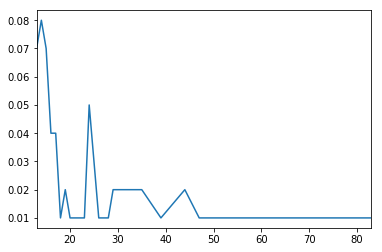

In [348]:
print(frequency)
frequency.plot()
plt.show()


In [136]:
fixedModel.schedule.agents[3].age

90

In [137]:
fixedModel.schedule.agents[3].aom

13

In [146]:
fixedModel.schedule.agents[5].value

71